In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [15]:
CARPETA_DATOS_LIMPIOS = 'Datos/Limpios/'
df= pd.read_csv(os.path.join(CARPETA_DATOS_LIMPIOS, 'df_adquisicion.csv'))
df_missings= pd.read_csv(os.path.join(CARPETA_DATOS_LIMPIOS, 'df_adquisicion_missings.csv'))

# Se entrenan los modelos con el df completo

In [5]:
df.head()

,growth_stage,Anos en Mercado,Cash flow mil EUR_2021,EBITDA mil EUR_2021,Inmovilizado mil EUR_2021,Fondos propios mil EUR_2021,Valor agregado mil EUR_2021,Total pasivo_ratio,Inmovilizado mil EUR_ratio,Capital social mil EUR,...,Gastos financieros mil EUR_ratio,Gastos de personal mil EUR_2021,Resultado financiero mil EUR_ratio,revenue_manufacturing,Total pasivo y capital propio mil EUR_2021,Total activo mil EUR_2021,Gastos financieros mil EUR_2021,Pasivo fijo mil EUR_2021,total_funding,Porcentaje_adquisicion_cat
0,2.0,32,3296.408000,3600.559000,8604.70000,12382.28400,6893.59300,1.439262,0.980366,745.330,...,1.526306,3302.98000,0.696217,1,1.950122e+04,1.950122e+04,100.03600,4198.31500,0.03,1
1,0.0,31,-35.104810,54.851080,137.24646,1242.34124,423.95067,0.600331,0.762976,291.485,...,43.385462,459.05548,-282.969141,0,1.793114e+03,1.793114e+03,90.16063,47.65796,0.07,1
2,1.0,38,3589.000000,6182.000000,150758.00000,146672.00000,105344.00000,1.163202,1.431985,2000.000,...,0.634522,98266.00000,-0.045835,0,1.183593e+06,1.183593e+06,3540.00000,216871.00000,0.00,2
3,2.0,20,-72.670569,-20.896349,2983.85415,1048.72675,1585.07324,1.635357,1.048763,158.970,...,1.723532,1584.17903,-0.993082,0,6.646021e+03,6.646021e+03,73.56478,1477.75274,0.56,1
4,2.0,18,3670.000000,9977.000000,143704.00000,167478.00000,12660.00000,0.947751,1.106232,13301.000,...,1.488876,7230.00000,1.617527,1,2.374040e+05,2.374040e+05,9971.00000,37827.00000,100.00,2


In [6]:
# se dividen los datos en train y test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Porcentaje_adquisicion_cat']), df['Porcentaje_adquisicion_cat'], test_size=0.1, random_state=42)

# se vuelve a dividir el train en train y validation

X_training, X_validation, y_training, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [7]:
# el primer modelo que se prueba es el automl de tpot

from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42, n_jobs=-1)
tpot.fit(X_training, y_training)



c:\Users\unaim\Anaconda3\envs\unaimleal\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


                                                                             
Generation 1 - Current best internal CV score: 0.5912994350282486
                                                                              
Generation 2 - Current best internal CV score: 0.5912994350282486
                                                                              
Generation 3 - Current best internal CV score: 0.5912994350282486
                                                                              
Generation 4 - Current best internal CV score: 0.6048587570621469
                                                                              
Generation 5 - Current best internal CV score: 0.6048587570621469
                                                                              
Best pipeline: RandomForestClassifier(MinMaxScaler(MLPClassifier(input_matrix, alpha=0.01, learning_rate_init=0.01)), bootstrap=True, criterion=gini, max_features=0.7500000000000001, min_samples_le

TPOTClassifier(generations=5, n_jobs=-1, population_size=50, random_state=42,
               verbosity=2)

Accuracy:  0.6216216216216216


c:\Users\unaim\Anaconda3\envs\unaimleal\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Users\unaim\Anaconda3\envs\unaimleal\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 25.722222222222214, 'Predicted')

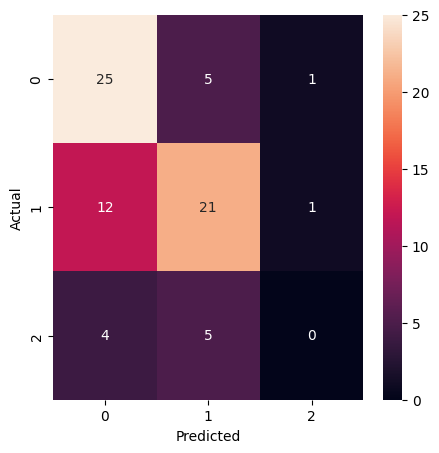

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# se prueba el modelo con los datos de test
prediccion = tpot.predict(X_validation)
print('Accuracy: ', accuracy_score(y_validation, prediccion))
# plot confusion matrix
cm = confusion_matrix(y_validation, prediccion)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [20]:
# se prueban modelos simples de sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# se entrenan los modelos
logreg = LogisticRegression()
logreg.fit(X_training, y_training)

rf = RandomForestClassifier()
rf.fit(X_training, y_training)

svc = SVC()
svc.fit(X_training, y_training)

knn = KNeighborsClassifier()
knn.fit(X_training, y_training)

dt = DecisionTreeClassifier()
dt.fit(X_training, y_training)

gnb = GaussianNB()
gnb.fit(X_training, y_training)

# se prueba el modelo con los datos de test
prediccion = logreg.predict(X_validation)
print('Regresion logistica: ', accuracy_score(y_validation, prediccion))

prediccion = rf.predict(X_validation)
print('Random forest: ', accuracy_score(y_validation, prediccion))

prediccion = svc.predict(X_validation)
print('SVC: ', accuracy_score(y_validation, prediccion))

prediccion = knn.predict(X_validation)
print('KNN: ', accuracy_score(y_validation, prediccion))

prediccion = dt.predict(X_validation)
print('Decision tree: ', accuracy_score(y_validation, prediccion))

prediccion = gnb.predict(X_validation)
print('GaussianNB: ', accuracy_score(y_validation, prediccion))


c:\Users\unaim\Anaconda3\envs\unaimleal\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Regresion logistica:  0.4189189189189189
Random forest:  0.5945945945945946
SVC:  0.4189189189189189
KNN:  0.5135135135135135
Decision tree:  0.5405405405405406
GaussianNB:  0.4864864864864865


Los modelos que mejor funcionan son el random forest y el arbol de decision

## STACKING

c:\Users\unaim\Anaconda3\envs\unaimleal\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\unaim\Anaconda3\envs\unaimleal\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Accuracy:  0.581081081081081


Text(0.5, 25.722222222222214, 'Predicted')

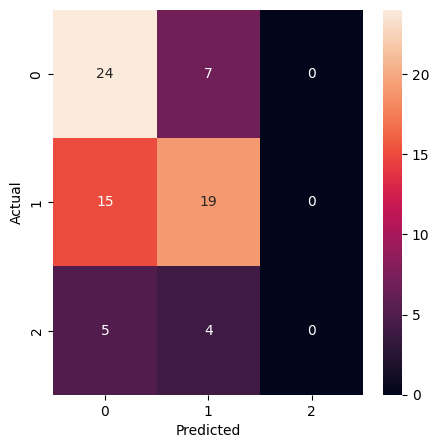

In [53]:
# se prueban algoritmos de stacking

from sklearn.ensemble import StackingClassifier

estimators = [
    ('rf', RandomForestClassifier(random_state=0)),
    ('log', LogisticRegression(max_iter=10000, random_state=0)),
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier(random_state=0)),
    ('gnb', GaussianNB())
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=SVC(random_state=0)
)
clf.fit(X_training, y_training)

prediccion = clf.predict(X_validation)
print('Accuracy: ', accuracy_score(y_validation, prediccion))
# plot confusion matrix
cm = confusion_matrix(y_validation, prediccion)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')


c:\Users\unaim\Anaconda3\envs\unaimleal\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy:  0.6216216216216216


Text(0.5, 25.722222222222214, 'Predicted')

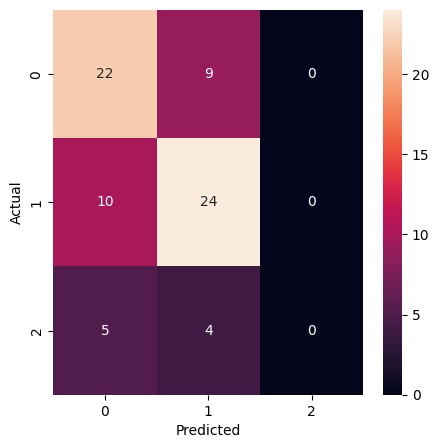

In [33]:
# bagging

from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=10, random_state=0).fit(X_training, y_training)

prediccion = clf.predict(X_validation)
print('Accuracy: ', accuracy_score(y_validation, prediccion))
# plot confusion matrix
cm = confusion_matrix(y_validation, prediccion)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [39]:
# se hace un grid search para encontrar los mejores parametros para el modelo

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5)
CV_rfc.fit(X_training, y_training)

print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

c:\Users\unaim\Anaconda3\envs\unaimleal\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\unaim\Anaconda3\envs\unaimleal\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\unaim\Anaconda3\envs\unaimleal\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 50}
0.6115819209039548


c:\Users\unaim\Anaconda3\envs\unaimleal\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy:  0.6351351351351351


c:\Users\unaim\Anaconda3\envs\unaimleal\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Text(0.5, 25.722222222222214, 'Predicted')

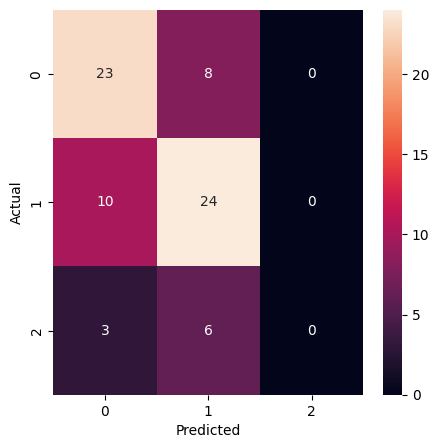

In [50]:
# se prueba el modelo con los hiperparametros encontrados

rf = RandomForestClassifier(n_estimators=50, max_features='auto', max_depth=5, criterion='gini', random_state=0)
rf.fit(X_training, y_training)

prediccion = rf.predict(X_validation)
print('Accuracy: ', accuracy_score(y_validation, prediccion))
# plot confusion matrix
cm = confusion_matrix(y_validation, prediccion)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')

El resultado mejora sustancialmente al cambiar los hiperparametros del random forest, mejorando el accuracy en 7 puntos porcentuales

In [43]:
# bayesion optimization

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

opt = BayesSearchCV(
    RandomForestClassifier(),
    {
        'n_estimators': Integer(10, 500),
        'max_features': Categorical(['auto', 'sqrt', 'log2']),
        'max_depth': Integer(4, 8),
        'criterion': Categorical(['gini', 'entropy'])
    },
    n_iter=32,
    cv=5,
    random_state=0,
    n_jobs=-1
)

opt.fit(X_training, y_training)

print(opt.best_params_)
print(opt.best_score_)
print(opt.best_estimator_)

c:\Users\unaim\Anaconda3\envs\unaimleal\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\unaim\Anaconda3\envs\unaimleal\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


OrderedDict([('criterion', 'gini'), ('max_depth', 4), ('max_features', 'sqrt'), ('n_estimators', 499)])
0.6046892655367232
RandomForestClassifier(max_depth=4, n_estimators=499)


In [49]:
# se prueba este modelo con los hiperparametros encontrados

rf = RandomForestClassifier(n_estimators=499, max_features='sqrt', max_depth=4, criterion='gini', random_state=0)
rf.fit(X_training, y_training)

prediccion = rf.predict(X_validation)
print('Accuracy: ', accuracy_score(y_validation, prediccion))


Accuracy:  0.5945945945945946


En este caso empeora el accuracy

Accuracy:  0.6216216216216216


Text(0.5, 25.722222222222214, 'Predicted')

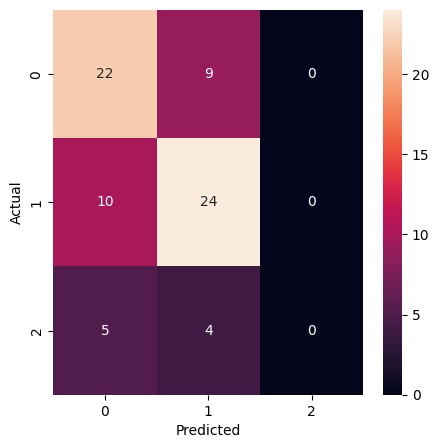

In [34]:
# obtener la matriz de probabilidades de clase
proba = clf.predict_proba(X_validation)

# establecer el umbral para la probabilidad de la clase 0
threshold = 0.7

# ajustar las predicciones en consecuencia
prediccion = [0 if p[0] >= threshold else p.argmax() for p in proba]

# calcular la precisión y trazar la matriz de confusión
print('Accuracy: ', accuracy_score(y_validation, prediccion))
cm = confusion_matrix(y_validation, prediccion)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')


Se ha conseguido mejorar ligéramente el score con el bagging

In [21]:
# se prueban modelos de boosting

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# se entrenan los modelos
ada = AdaBoostClassifier()
ada.fit(X_training, y_training)

gbc = GradientBoostingClassifier()
gbc.fit(X_training, y_training)

xgb = XGBClassifier()
xgb.fit(X_training, y_training)

cbc = CatBoostClassifier()
cbc.fit(X_training, y_training)

# se prueba el modelo con los datos de test
prediccion = ada.predict(X_validation)
print('AdaBoost: ', accuracy_score(y_validation, prediccion))

prediccion = gbc.predict(X_validation)
print('GradientBoosting: ', accuracy_score(y_validation, prediccion))

prediccion = xgb.predict(X_validation)
print('XGBoost: ', accuracy_score(y_validation, prediccion))

prediccion = cbc.predict(X_validation)
print('CatBoost: ', accuracy_score(y_validation, prediccion))

Learning rate set to 0.074363
0:	learn: 1.0779801	total: 197ms	remaining: 3m 16s
1:	learn: 1.0579497	total: 223ms	remaining: 1m 51s
2:	learn: 1.0433610	total: 250ms	remaining: 1m 23s
3:	learn: 1.0261371	total: 277ms	remaining: 1m 9s
4:	learn: 1.0088632	total: 303ms	remaining: 1m
5:	learn: 0.9959522	total: 335ms	remaining: 55.6s
6:	learn: 0.9814249	total: 368ms	remaining: 52.2s
7:	learn: 0.9706932	total: 402ms	remaining: 49.9s
8:	learn: 0.9538140	total: 435ms	remaining: 47.9s
9:	learn: 0.9378941	total: 467ms	remaining: 46.2s
10:	learn: 0.9256040	total: 503ms	remaining: 45.2s
11:	learn: 0.9136794	total: 534ms	remaining: 43.9s
12:	learn: 0.9032815	total: 564ms	remaining: 42.8s
13:	learn: 0.8925641	total: 596ms	remaining: 42s
14:	learn: 0.8830767	total: 629ms	remaining: 41.3s
15:	learn: 0.8722944	total: 665ms	remaining: 40.9s
16:	learn: 0.8631849	total: 698ms	remaining: 40.3s
17:	learn: 0.8516943	total: 733ms	remaining: 40s
18:	learn: 0.8448322	total: 768ms	remaining: 39.6s
19:	learn: 0.83

En este caso el catboost da el mismo resultado que el random forest y el XGBoost también da muy buenos resultados, mejores que el arbol de decision

# Modelos con df con missings

In [23]:
# se divide en train y test

X_train_missings, X_test_missings, y_train_missings, y_test_missings = train_test_split(df_missings.drop(columns=['Porcentaje_adquisicion_cat']), df_missings['Porcentaje_adquisicion_cat'], test_size=0.1, random_state=42)

# se vuelve a dividir el train en train y validation

X_training_missings, X_validation_missings, y_training_missings, y_validation_missings = train_test_split(X_train_missings, y_train_missings, test_size=0.2, random_state=42)

In [35]:
# el primer modelo que se prueba es el automl de tpot

tpot = TPOTClassifier(generations=2, population_size=50, verbosity=2, random_state=42, n_jobs=-1)
tpot.fit(X_training_missings, y_training_missings)

                                                                             
Generation 1 - Current best internal CV score: 0.6048022598870058
                                                                              
Generation 2 - Current best internal CV score: 0.6048022598870058
                                                                              
Best pipeline: RandomForestClassifier(MinMaxScaler(LogisticRegression(input_matrix, C=5.0, dual=False, penalty=l2)), bootstrap=True, criterion=gini, max_features=0.2, min_samples_leaf=8, min_samples_split=4, n_estimators=100)


TPOTClassifier(generations=2, n_jobs=-1, population_size=50, random_state=42,
               verbosity=2)

Accuracy:  0.6351351351351351


c:\Users\unaim\Anaconda3\envs\unaimleal\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\unaim\Anaconda3\envs\unaimleal\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0.5, 25.722222222222214, 'Predicted')

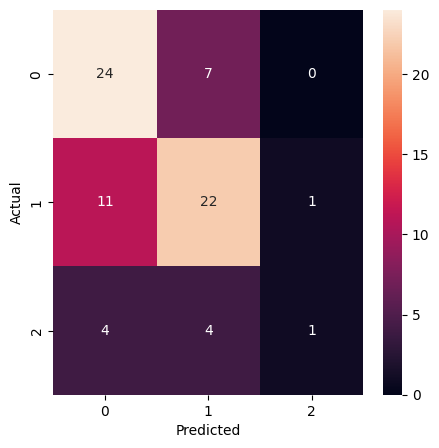

In [36]:
# se prueba el modelo con los datos de validacion
prediccion = tpot.predict(X_validation_missings)
print('Accuracy: ', accuracy_score(y_validation_missings, prediccion))
# plot confusion matrix
cm = confusion_matrix(y_validation_missings, prediccion)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [25]:
# se prueban modelos de boosting

# se entrenan los modelos
ada = AdaBoostClassifier()
ada.fit(X_training_missings, y_training_missings)

gbc = GradientBoostingClassifier()
gbc.fit(X_training_missings, y_training_missings)

xgb = XGBClassifier()
xgb.fit(X_training_missings, y_training_missings)

cbc = CatBoostClassifier()
cbc.fit(X_training_missings, y_training_missings)

# se prueba el modelo con los datos de test
prediccion = ada.predict(X_validation_missings)
print('AdaBoost: ', accuracy_score(y_validation_missings, prediccion))

prediccion = gbc.predict(X_validation_missings)
print('GradientBoosting: ', accuracy_score(y_validation_missings, prediccion))

prediccion = xgb.predict(X_validation_missings)
print('XGBoost: ', accuracy_score(y_validation_missings, prediccion))

prediccion = cbc.predict(X_validation_missings)
print('CatBoost: ', accuracy_score(y_validation_missings, prediccion))

Learning rate set to 0.074363
0:	learn: 1.0779801	total: 27.6ms	remaining: 27.6s
1:	learn: 1.0579497	total: 49.7ms	remaining: 24.8s
2:	learn: 1.0433610	total: 73.3ms	remaining: 24.4s
3:	learn: 1.0261371	total: 98.7ms	remaining: 24.6s
4:	learn: 1.0088632	total: 122ms	remaining: 24.3s
5:	learn: 0.9959522	total: 147ms	remaining: 24.3s
6:	learn: 0.9814249	total: 170ms	remaining: 24s
7:	learn: 0.9706932	total: 197ms	remaining: 24.4s
8:	learn: 0.9538140	total: 219ms	remaining: 24.1s
9:	learn: 0.9378941	total: 241ms	remaining: 23.8s
10:	learn: 0.9256040	total: 263ms	remaining: 23.7s
11:	learn: 0.9136794	total: 284ms	remaining: 23.4s
12:	learn: 0.9032815	total: 304ms	remaining: 23.1s
13:	learn: 0.8925641	total: 325ms	remaining: 22.9s
14:	learn: 0.8830767	total: 347ms	remaining: 22.8s
15:	learn: 0.8722944	total: 367ms	remaining: 22.6s
16:	learn: 0.8631849	total: 388ms	remaining: 22.4s
17:	learn: 0.8516943	total: 408ms	remaining: 22.2s
18:	learn: 0.8448322	total: 431ms	remaining: 22.2s
19:	learn

Se obtienen los mismos resultados que con el df completo